In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [2]:
import pandas as pd
import numpy as np

def import_csv_as_numpy(filename):
    """
    Import a CSV file as a NumPy array and convert any 'tensor(...)'
    string in the 'final_size' column into a float.
    
    Args:
        filename (str): Path to the CSV file.
    
    Returns:
        np.ndarray: The data from the CSV file as a NumPy array.
        np.ndarray: The column names as a NumPy array.
    """
    try:
        # Use converters to strip out the 'tensor(...)' for final_size column
        def tensor_to_float(x):
            # Assumes a string like "tensor(0.1234)" 
            # We just extract the portion inside parentheses and cast to float
            return float(x.replace("tensor(", "").replace(")", ""))

        data = pd.read_csv(
            filename,
            converters={"final_size": tensor_to_float}
        )
        
        return data.to_numpy(), data.columns.to_numpy()
    except Exception as e:
        print(f"Error reading file {filename}: {e}")
        return None, None

import re

def parse_tensor_str(t):
    # Simple regex to capture the numeric value inside "tensor( ... )"
    match = re.search(r"tensor\(([^)]+)\)", t)
    if match:
        return float(match.group(1))
    else:
        raise ValueError(f"String {t} does not match the format tensor(...)")


def DataFromIQR(Q1,Q2,Q3): # Creates a dataset with a desired interquartile range
    #Q1 is lower quartile, Q2 is median, Q3 is upper quartile
    return [Q1, Q1, Q1, Q2, Q2, Q2, Q3, Q3, Q3]

# Partner data - See figure caption for references

# Empirical data, by country, partners in 21 days:
IQR21_NYC = [1,3,5]
N_NYC = 651
NYC_data = DataFromIQR(*IQR21_NYC)
IQR21_Spain = [1,3,6]
N_Spain21 = 473
Spain21_data = DataFromIQR(*IQR21_Spain)
IQR21_Belgium = [1,2,5]
N_Belgium = 155
Belgium_data = DataFromIQR(*IQR21_Belgium)
# Empirical data, by country, partners in 90 days:
IQR90_Spain = [3,6.5,16]
N_Spain90 = 181
Spain90_data = DataFromIQR(*IQR90_Spain)
IQR90_International = [3,5,15]
N_intern = 406
Internaional_data = DataFromIQR(*IQR90_International)
# Weighted means
IQR21_weight_mean  = [1,2.9,5.4]
IQR90_weight_mean  = [3,5.5,15.3]
weight_mean_data21      = DataFromIQR(*IQR21_weight_mean)
weight_mean_data90      = DataFromIQR(*IQR90_weight_mean)


In [3]:
p = 0.48
ub = 300
pexp = 1.55
M = 0 # This chooses the "no network" version with only new encounters
N = 170000
if M == 0:
    addendum = "_no_network"
else:
    addendum = ""
if pexp == 1.55:
    results_filename = f'results_N={N}_ub={ub}_p={p}' + addendum + '.csv'
    inf_prob_filename = f'inf_prob_vals_N={N}_ub={ub}_p={p}' + addendum + '.csv'
    inf_prob_partners_filename = f'inf_prob_partners_vals_N={N}_ub={ub}_p={p}' + addendum + '.csv'
else:
    results_filename = f'results_N={N}_ub={ub}_p={p}' + addendum + f'_pexp={pexp}.csv'
    inf_prob_filename = f'inf_prob_vals_N={N}_ub={ub}_p={p}' + addendum + f'_pexp={pexp}.csv'
    inf_prob_partners_filename = f'inf_prob_partners_vals_N={N}_ub={ub}_p={p}' + addendum + f'_pexp={pexp}.csv'

# Import data and column names
results_data, results_columns = import_csv_as_numpy(results_filename)
inf_prob_data, inf_prob_columns = import_csv_as_numpy(inf_prob_filename)
inf_prob_partners_data, inf_prob_partners_columns = import_csv_as_numpy(inf_prob_partners_filename)

inf_prob_partners_data = float_arr = np.array([
    [float(x.replace('tensor(', '').replace(')', '')) for x in row] 
    for row in inf_prob_partners_data
], dtype=float)

inf_prob_data = float_arr = np.array([
    [float(x.replace('tensor(', '').replace(')', '')) for x in row] 
    for row in inf_prob_data
], dtype=float)

# Extract bin centers from column names
inf_prob_bin_centers = [float(col.split('_')[-1]) for col in inf_prob_columns if 'center' in col]
inf_prob_partners_bin_centers = [float(col.split('_')[-1]) for col in inf_prob_partners_columns if 'center' in col]

inf_prob_bin_centers = [float(col.split('_')[-1]) for col in inf_prob_columns]
inf_prob_partners_bin_centers = [float(col.split('_')[-1]) for col in inf_prob_partners_columns]


#for i,finsize in enumerate(results_data[:,-2]):
    #results_data[i,-2] = finsize.numpy()
print(f"Mean R0 = {np.mean(results_data[:,0])}")
print(f"Mean final size = {np.mean(results_data[:,-2])}")
# # Display shapes and bin centers
# print(f"Results data shape: {results_data.shape}")
# print(f"First few rows:\n{results_data[:5]}")

# print(f"Infection probability (r_new) data shape: {inf_prob_data.shape}")
# print(f"First few rows:\n{inf_prob_data[:5]}")
# print(f"Infection probability (r_new) bin centers:\n{inf_prob_bin_centers}")

# print(f"Infection probability (partners) data shape: {inf_prob_partners_data.shape}")
# print(f"First few rows:\n{inf_prob_partners_data[:5]}")
# print(f"Infection probability (partners) bin centers:\n{inf_prob_partners_bin_centers}")


Mean R0 = 1.9818723877271016
Mean final size = 0.06966


In [4]:
modeldata21 = DataFromIQR(results_data[:,2].mean(),results_data[:,3].mean(),results_data[:,4].mean())
modeldata90 = DataFromIQR(results_data[:,5].mean(),results_data[:,6].mean(),results_data[:,7].mean())

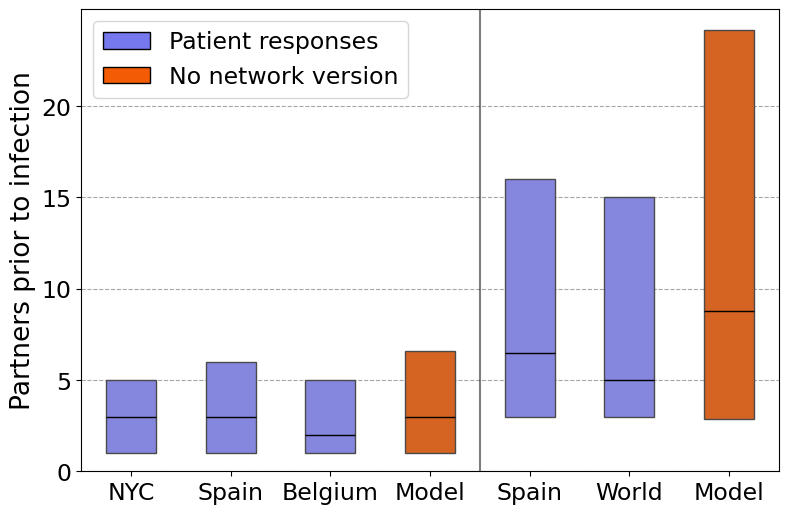

In [5]:
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# Define custom colors
colors = ['#7678ed', '#7678ed', '#7678ed', '#f35b04','#7678ed', '#7678ed', '#f35b04']
colors_short = ['#7678ed','#f35b04']
# Boxplot without whiskers and dots, with custom colors and alpha
boxplot = sns.boxplot(data=[NYC_data, Spain21_data, Belgium_data, modeldata21, Spain90_data,Internaional_data,modeldata90], ax=ax, width=0.5, showfliers=False, showcaps=False, whis=0,
                      palette=colors,  # Use the colors from the list
                      medianprops={'color': 'black'})


# Manually setting the color of each box
for i, artist in enumerate(boxplot.artists):
    artist.set_facecolor(colors[i])
    artist.set_edgecolor('black')  # Ensure edge color is black
    artist.set_linewidth(20)


# Add horizontal gridlines
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.7)

if M == 0:
    modelname = 'No network version'  # Define the labels for each box
else:
    modelname = "Model"
legend_labels = ['Patient responses', modelname]  # Define the labels for each box
handles = [Patch(facecolor=colors_short[i], edgecolor='black') for i in range(len(legend_labels))]  # Create patches with the corresponding colors

# Add the legend to the plot
ax.legend(handles=handles, labels=legend_labels,loc="upper left",fontsize=17)

# Set other plot details
ax.set_ylim(0)
ax.set_xticks([0,1,2,3,4,5,6])  # Set x-tick positions between the boxes
ax.set_xticklabels(['NYC','Spain','Belgium','Model','Spain','World','Model'],fontsize=17)  # Set your custom labels here
ax.set_ylabel('Partners prior to infection',fontsize = 19)
ax.set_yticks([0,5,10,15,20])
ax.set_yticklabels([0,5,10,15,20],fontsize = 17)

ax.axvline(3.5, color = "k", alpha = 0.5)
# Horizontal lines and shaded areas
#ax.axhline(IQR_data21[1], color="k", alpha=0.5, zorder=0, xmin=0.125, xmax=0.4)
#ax.fill_between([0, 1.25], IQR_data21[0], IQR_data21[2], color='gray', alpha=0.3)

#ax.axhline(IQR_data90[1], color="k", alpha=0.5, zorder=0, xmin=0.6, xmax=0.9)
#ax.fill_between([2, 3], IQR_data90[0], IQR_data90[2], color='gray', alpha=0.3)

# Show the plot
plt.show()